# Chapter 11 exercise 8 - Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow

Practice training a deep neural network on the CIFAR10 image dataset.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import mlflow.keras
import cv2

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

mlflow.tensorflow.autolog()

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# X_train_full = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train_full])
# X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

X_train_full = X_train_full #/ 255.0
X_test = X_test #/ 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
for image in X_train_full:
    print(image.shape)
    break

(32, 32, 3)


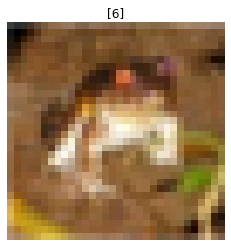

In [4]:
i = 0
plt.title(f"{y_train_full[i]}")
plt.imshow(X_train_full[i], cmap="binary")
plt.axis('off')
plt.show()

c:\Users\willi\repos\cifar10\.venv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


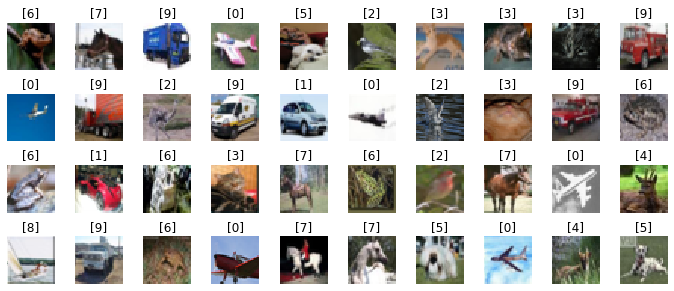

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
n_hidden_layers = 10
n_neurons = 100

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3])
])

for _ in range(n_hidden_layers):
    model.add(keras.layers.Dense(n_neurons, activation="ELU", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [10]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

2022/06/14 20:00:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '646a9359535b4b51a17121a0babf9e83', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/40
1407/1407 [==============================] - 15s 9ms/step - loss: 4.2713 - accuracy: 0.1877 - val_loss: 2.0765 - val_accuracy: 0.2156
Epoch 2/40
1407/1407 [==============================] - 13s 9ms/step - loss: 2.0066 - accuracy: 0.2457 - val_loss: 2.0244 - val_accuracy: 0.2452
Epoch 3/40
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9428 - accuracy: 0.2821 - val_loss: 2.2477 - val_accuracy: 0.2312
Epoch 4/40
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9192 - accuracy: 0.2930 - val_loss: 2.1197 - val_accuracy: 0.2266
Epoch 5/40
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8881 - accuracy: 0.3056 - val_loss: 1.9184 - val_accuracy: 0.2896
Epoch 6/40
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8576 - accuracy: 0.3173 - val_loss: 1.9420 - val_accuracy: 0.2928
Epoch 7/40
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8323 - accuracy: 0.3277 - val_loss: 1.8492 - val_ac

INFO:tensorflow:Assets written to: C:\Users\willi\AppData\Local\Temp\tmpucas5e0x\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\willi\AppData\Local\Temp\tmpucas5e0x\model\data\model\assets


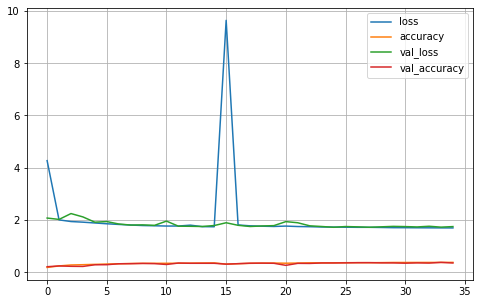

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step
